In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../outputs/merged.csv')
df.shape

(20099, 8)

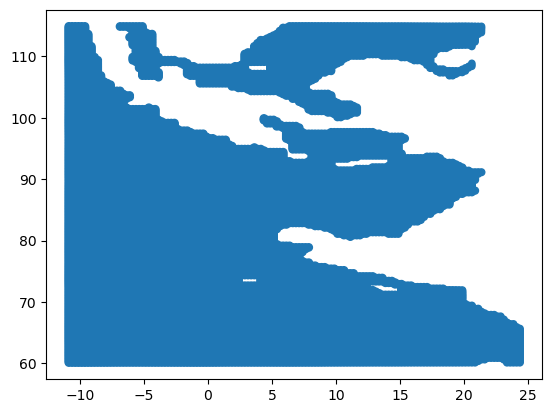

In [7]:
plt.scatter(df['lat'],df['lon'], df['sea_surface_temperature'])

In [8]:
from datetime import datetime
df['time_x'] = pd.to_datetime(df['time_x'])
df.drop(columns= 'time_x',inplace=True,axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(df, test_size=0.33, random_state=42)  

In [10]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[457247636639.9624,
 114313343026.35118,
 50304751629.22073,
 28348286566.9506,
 18110287061.658974,
 12578868303.18909,
 9263348810.588892,
 7077974242.327714,
 5579600815.676246,
 4589420716.873619]

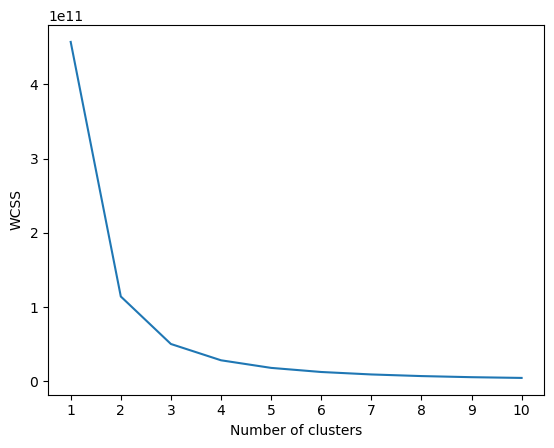

In [12]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
knmeans = KMeans(n_clusters=2, init='k-means++')

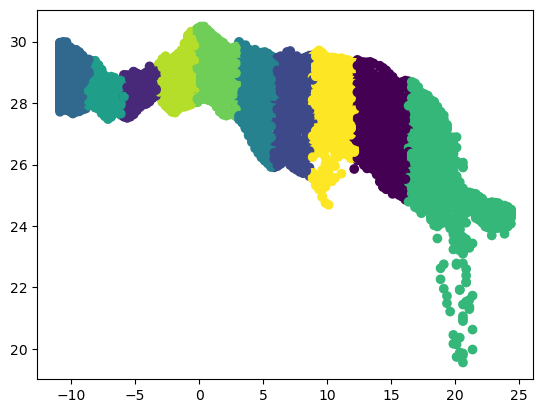

In [14]:
y_labels = kmeans.fit_predict(X_train)
plt.scatter(X_train['lat'],X_train['sea_surface_temperature'],c=y_labels)

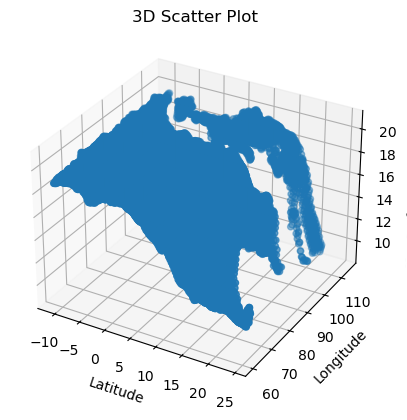

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('../outputs/merged.csv')

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(data['lat'], data['lon'], data['specific_humidity'])

# Set labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('specific_humidity')
ax.set_title('3D Scatter Plot')

plt.show()